In [93]:
import matplotlib.pyplot as plt
import numpy as np


def draw_clear_board(x_min, x_max, y_min, y_max):
    fig, ax = plt.subplots()

    # 移动 x 轴和 y 轴到图形中心
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # 隐藏顶部和右侧的脊线
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # 在 x 轴和 y 轴上添加箭头
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

    # 添加网格
    # ax.grid(True, which='both')

    # 设置 x 和 y 轴的范围
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    return ax

def display_samples_and_boundary(samples, labels, W, b):
    """ 显示样本点和分类边界 """
    draw_clear_board(-2, 2, -2, 2)
    for i, label in enumerate(['x', 'o']):
        plt.scatter(samples[labels == i, 0],samples[labels == i, 1], color=['red', 'blue'][i], marker=label, label=['negative', 'positive'][i])
    plt.legend()

    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = W[0] * X + W[1] * Y + b
    plt.contour(X, Y, Z, levels=[0], colors='green')

In [99]:
def predict(W, b, x):
    """
    预测
    正类返回 1，负类返回 0
    """
    return np.where(np.dot(W, x) + b > 0, 1, 0)

def update(x, y, W, b, eta):
    """ 更新权重和偏置 """
    y_hat = predict(W, b, x)
    W += eta * (y - y_hat) * x
    b += eta * (y - y_hat)
    return W, b

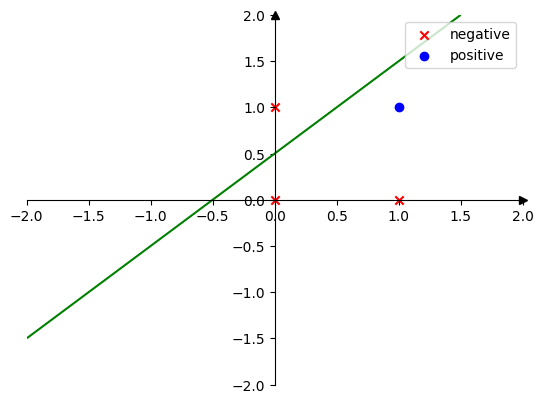

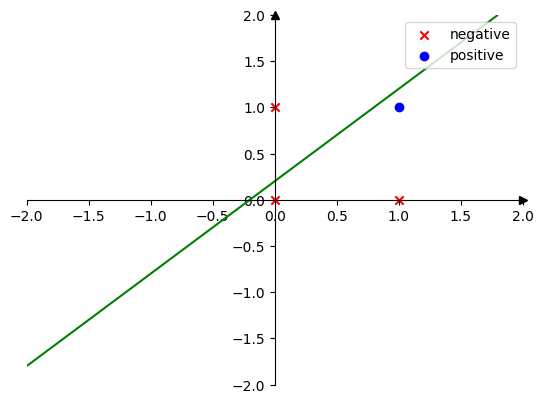

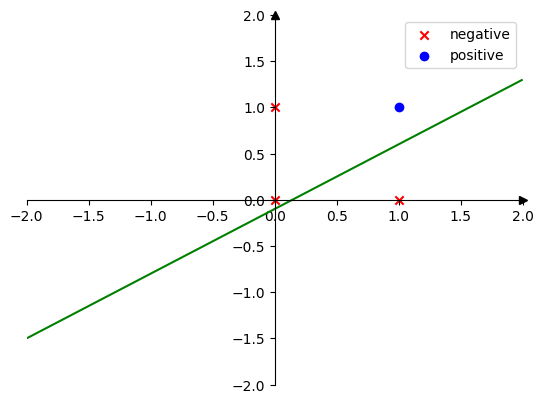

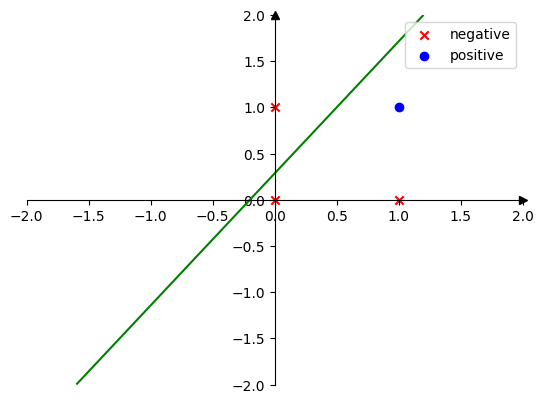

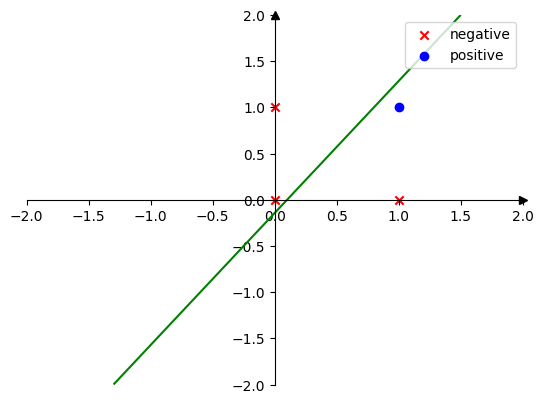

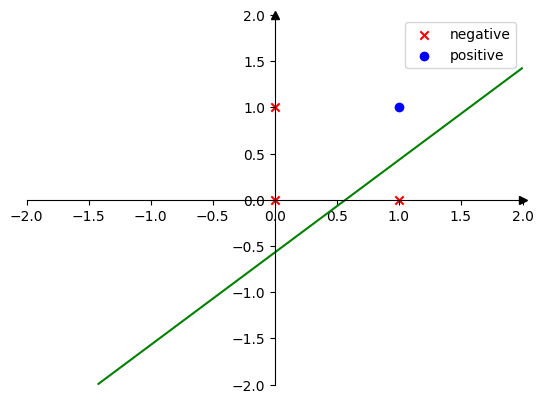

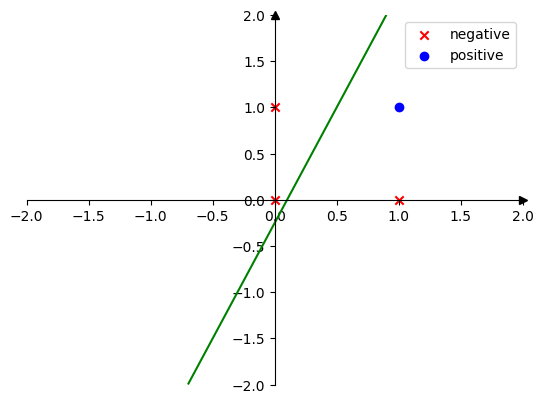

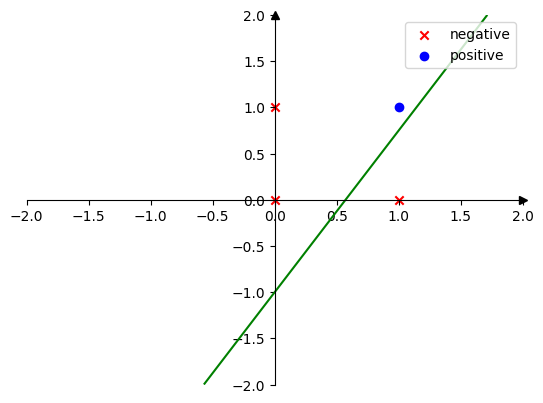

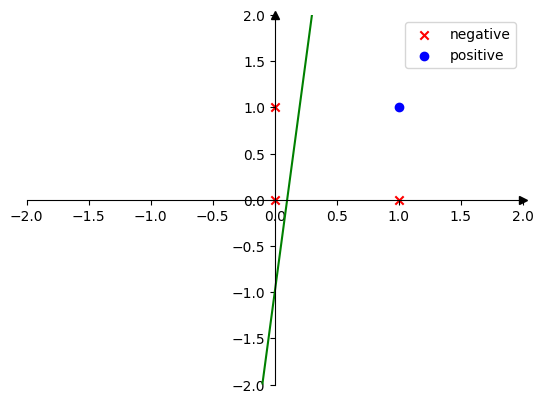

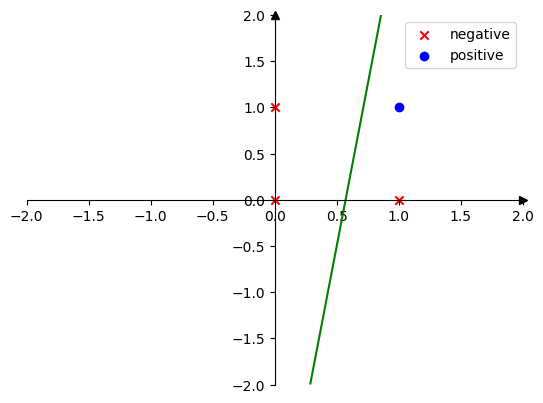

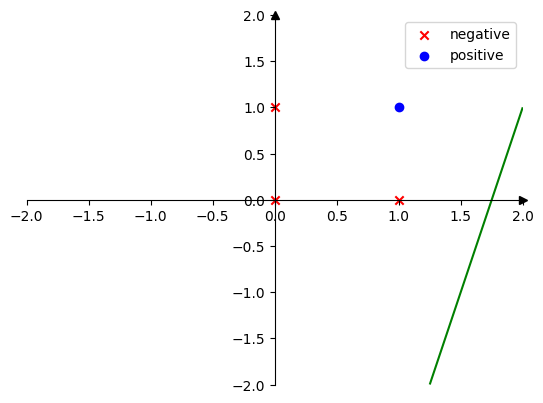

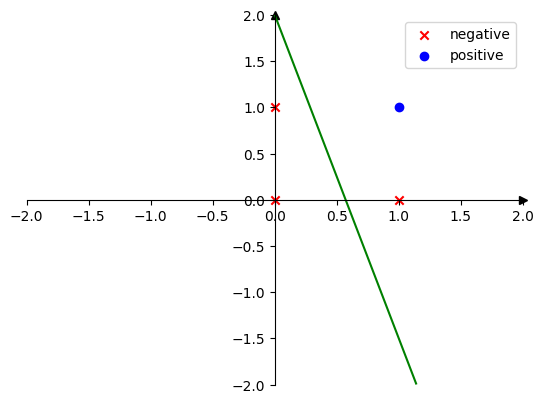

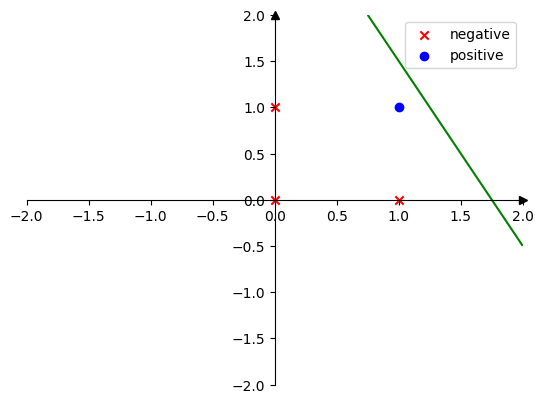

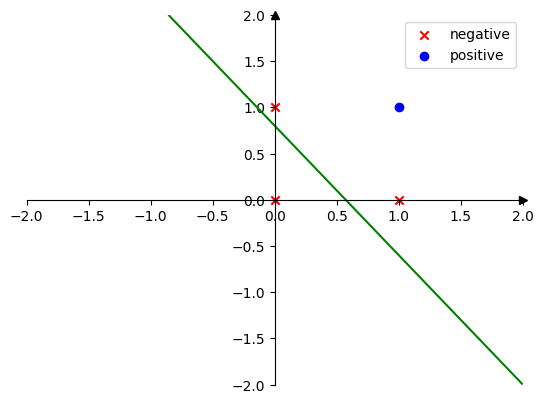

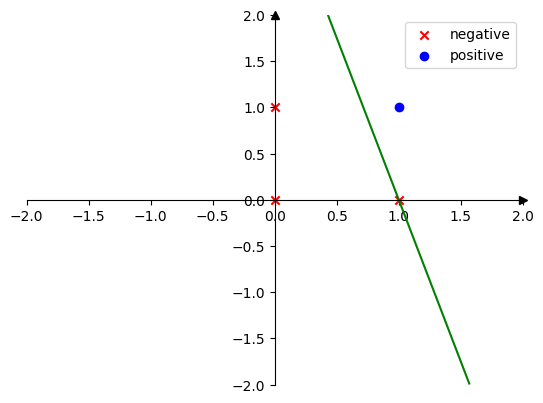

训练完成，迭代次数：8


In [102]:
import matplotlib.pyplot as plt
import numpy as np


W = np.array([1.0, -1.0])
b = 0.5
eta = 0.3

# 定义 4 个代表 AND 与运算的样本
samples = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
labels = np.array([0, 0, 0, 1], dtype=np.float32,)

display_samples_and_boundary(samples, labels, W, b)

errors = True
i = 0
while errors:
    errors = False
    i += 1
    for x, y in zip(samples, labels):
        y_hat = predict(W, b, x)
        if y_hat != y:
            W, b = update(x, y, W, b, eta)
            errors = True
            display_samples_and_boundary(samples, labels, W, b)
            plt.pause(0.5)

print(f"训练完成，迭代次数：{i}")

In [104]:
W, b

(array([0.69999999, 0.20000005]), -0.7)